In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ast
import re

In [2]:
course_resource = pd.read_csv("/kaggle/input/filter-course-by-info/course_resource_new_id.csv")
course_resource

,course_id,resource_id
0,C_1017355,V_1617852
1,C_1017355,Ex_1617883
2,C_1017355,Ex_1617881
3,C_1017355,Ex_1617879
4,C_1017355,Ex_1617877
...,...,...
173597,C_956130,V_6304392
173598,C_956130,V_6304390
173599,C_956130,V_6304388
173600,C_956130,V_6304416


In [3]:
course_resource_ex = course_resource[course_resource['resource_id'].str.startswith('Ex_')].reset_index(drop=True)
course_resource_ex

,course_id,resource_id
0,C_1017355,Ex_1617883
1,C_1017355,Ex_1617881
2,C_1017355,Ex_1617879
3,C_1017355,Ex_1617877
4,C_1017355,Ex_1617875
...,...,...
46959,C_956130,Ex_6304407
46960,C_956130,Ex_6304425
46961,C_956130,Ex_6304318
46962,C_956130,Ex_7777121


## Drop những exercise là bài kiểm tra cuối khóa

In [4]:
course_with_exam = pd.read_csv("/kaggle/input/course-with-exam/final_course_exam.csv")
course_with_exam

,Unnamed: 0,id,exam_resources
0,0,C_1073350,"['Ex_1650729', 'Ex_1650730']"
1,1,C_1714443,['Ex_3625291']
2,2,C_1718815,['Ex_4974697']
3,3,C_1721804,"['Ex_3742687', 'Ex_3742688']"
4,4,C_1724283,['Ex_3800298']
...,...,...,...
373,373,C_948114,"['Ex_1467099', 'Ex_1573116', 'Ex_1573117']"
374,374,C_948123,['Ex_1467720']
375,375,C_948128,"['Ex_6318041', 'Ex_6318076']"
376,376,C_948140,['Ex_1469502']


In [5]:
course_with_exam['exam_resources'] = course_with_exam['exam_resources'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

course_with_exam = course_with_exam.explode('exam_resources').reset_index(drop=True)
course_with_exam

,Unnamed: 0,id,exam_resources
0,0,C_1073350,Ex_1650729
1,0,C_1073350,Ex_1650730
2,1,C_1714443,Ex_3625291
3,2,C_1718815,Ex_4974697
4,3,C_1721804,Ex_3742687
...,...,...,...
488,376,C_948140,Ex_1469502
489,377,C_948148,Ex_1470485
490,377,C_948148,Ex_5941667
491,377,C_948148,Ex_1470486


In [6]:
course_resource_ex_no_final = course_resource_ex[
    ~course_resource_ex['resource_id'].isin(course_with_exam['exam_resources'])
].reset_index(drop=True)
course_resource_ex_no_final

,course_id,resource_id
0,C_1017355,Ex_1617883
1,C_1017355,Ex_1617881
2,C_1017355,Ex_1617879
3,C_1017355,Ex_1617877
4,C_1017355,Ex_1617875
...,...,...
46585,C_956130,Ex_6304407
46586,C_956130,Ex_6304425
46587,C_956130,Ex_6304318
46588,C_956130,Ex_7777121


In [7]:
user_exercise = pd.read_csv("/kaggle/input/final-user-problem-train/grouped_lists.csv")
user_exercise

,user_id_,course_id_,exercise_id,is_correct_sum,is_correct_count,is_correct_mean,is_correct_list,attempts_sum,attempts_mean,attempts_list,...,submit_time_diff_hours,submit_hours_unique,percentage_correct,percentage_score,problem_count,problem_sum,is_completed,percentage_completed,percentage_correct_completed,percentage_score_completed
0,U_10000,C_2033958,Ex_7007033,1,7,0.142857,"[0, 0, 1, 0, 0, 0, 0]",7,1.0,"[1, 1, 1, 1, 1, 1, 1]",...,0.073611,"[10, 10, 10, 10, 10, 10, 10]",0.142857,0.090909,8,14.0,0,0.875000,0.125000,0.071429
1,U_1000454,C_2199449,Ex_7396062,3,3,1.000000,"[1, 1, 1]",3,1.0,"[1, 1, 1]",...,0.007500,"[21, 21, 21]",1.000000,1.000000,10,10.0,0,0.300000,0.300000,0.300000
2,U_1000979,C_947149,Ex_1431533,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",...,0.002778,"[14, 14, 14, 14, 14]",1.000000,1.000000,5,4.0,1,1.000000,1.000000,1.000000
3,U_1000979,C_947149,Ex_1431535,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",...,0.016111,"[14, 14, 14, 14, 14]",1.000000,1.000000,5,4.0,1,1.000000,1.000000,1.000000
4,U_1000979,C_947149,Ex_1431537,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",...,0.018889,"[14, 14, 14, 14, 14]",1.000000,1.000000,5,4.0,1,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036019,U_99772,C_1903985,Ex_6179341,34,40,0.850000,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...",40,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,128.621389,"[15, 15, 21, 15, 20, 15, 17, 17, 23, 23, 23, 2...",0.850000,0.833333,45,110.0,0,0.888889,0.755556,0.454545
2036020,U_99772,C_1903985,Ex_6179343,16,20,0.800000,"[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...",20,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,455.118889,"[23, 14, 1, 20, 15, 15, 22, 19, 23, 23, 23, 23...",0.800000,0.800000,23,60.0,0,0.869565,0.695652,0.400000
2036021,U_99772,C_1903985,Ex_6179345,8,10,0.800000,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 0]",10,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",...,70.933333,"[22, 16, 0, 17, 22, 16, 23, 23, 17, 23]",0.800000,0.733333,12,35.0,0,0.833333,0.666667,0.314286
2036022,U_99772,C_1903985,Ex_6179347,6,6,1.000000,"[1, 1, 1, 1, 1, 1]",6,1.0,"[1, 1, 1, 1, 1, 1]",...,13.814444,"[0, 14, 14, 14, 0, 0]",1.000000,1.000000,8,27.0,0,0.750000,0.750000,0.259259


In [8]:
user_exercise_course = user_exercise[['user_id_', 'course_id_']]
user_exercise_course = user_exercise_course.drop_duplicates().reset_index(drop=True)
user_exercise_course

,user_id_,course_id_
0,U_10000,C_2033958
1,U_1000454,C_2199449
2,U_1000979,C_947149
3,U_1000982,C_947149
4,U_1001176,C_947149
...,...,...
117361,U_99746,C_674971
117362,U_997506,C_2095102
117363,U_99753,C_1428968
117364,U_997542,C_2066096


In [9]:
# Đổi tên các cột để thống nhất trước khi merge
user_exercise_course = user_exercise_course.rename(columns={'course_id_': 'course_id', 'user_id_': 'user_id'})
course_resource_ex_no_final = course_resource_ex_no_final.rename(columns={'resource_id': 'exercise_id'})

# Merge theo course_id để gán exercise_id vào từng user
user_course_exercise = pd.merge(user_exercise_course, course_resource_ex_no_final, on='course_id', how='inner')
user_course_exercise

,user_id,course_id,exercise_id
0,U_10000,C_2033958,Ex_7006978
1,U_10000,C_2033958,Ex_7006989
2,U_10000,C_2033958,Ex_7006996
3,U_10000,C_2033958,Ex_7007002
4,U_10000,C_2033958,Ex_7007011
...,...,...,...
3560944,U_99772,C_1903985,Ex_6179341
3560945,U_99772,C_1903985,Ex_6179343
3560946,U_99772,C_1903985,Ex_6179345
3560947,U_99772,C_1903985,Ex_6179347


In [10]:
user_exercise = user_exercise.rename(columns={'course_id_': 'course_id', 'user_id_': 'user_id'})
user_exercise

,user_id,course_id,exercise_id,is_correct_sum,is_correct_count,is_correct_mean,is_correct_list,attempts_sum,attempts_mean,attempts_list,...,submit_time_diff_hours,submit_hours_unique,percentage_correct,percentage_score,problem_count,problem_sum,is_completed,percentage_completed,percentage_correct_completed,percentage_score_completed
0,U_10000,C_2033958,Ex_7007033,1,7,0.142857,"[0, 0, 1, 0, 0, 0, 0]",7,1.0,"[1, 1, 1, 1, 1, 1, 1]",...,0.073611,"[10, 10, 10, 10, 10, 10, 10]",0.142857,0.090909,8,14.0,0,0.875000,0.125000,0.071429
1,U_1000454,C_2199449,Ex_7396062,3,3,1.000000,"[1, 1, 1]",3,1.0,"[1, 1, 1]",...,0.007500,"[21, 21, 21]",1.000000,1.000000,10,10.0,0,0.300000,0.300000,0.300000
2,U_1000979,C_947149,Ex_1431533,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",...,0.002778,"[14, 14, 14, 14, 14]",1.000000,1.000000,5,4.0,1,1.000000,1.000000,1.000000
3,U_1000979,C_947149,Ex_1431535,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",...,0.016111,"[14, 14, 14, 14, 14]",1.000000,1.000000,5,4.0,1,1.000000,1.000000,1.000000
4,U_1000979,C_947149,Ex_1431537,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",...,0.018889,"[14, 14, 14, 14, 14]",1.000000,1.000000,5,4.0,1,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036019,U_99772,C_1903985,Ex_6179341,34,40,0.850000,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...",40,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,128.621389,"[15, 15, 21, 15, 20, 15, 17, 17, 23, 23, 23, 2...",0.850000,0.833333,45,110.0,0,0.888889,0.755556,0.454545
2036020,U_99772,C_1903985,Ex_6179343,16,20,0.800000,"[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...",20,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,455.118889,"[23, 14, 1, 20, 15, 15, 22, 19, 23, 23, 23, 23...",0.800000,0.800000,23,60.0,0,0.869565,0.695652,0.400000
2036021,U_99772,C_1903985,Ex_6179345,8,10,0.800000,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 0]",10,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",...,70.933333,"[22, 16, 0, 17, 22, 16, 23, 23, 17, 23]",0.800000,0.733333,12,35.0,0,0.833333,0.666667,0.314286
2036022,U_99772,C_1903985,Ex_6179347,6,6,1.000000,"[1, 1, 1, 1, 1, 1]",6,1.0,"[1, 1, 1, 1, 1, 1]",...,13.814444,"[0, 14, 14, 14, 0, 0]",1.000000,1.000000,8,27.0,0,0.750000,0.750000,0.259259


In [11]:
user_course_exercise = user_course_exercise.merge(user_exercise[['course_id', 'user_id', 'exercise_id', 'percentage_score_completed']], 
                                                  on = ['course_id', 'user_id', 'exercise_id'], how = 'left')
user_course_exercise

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,user_id,course_id,exercise_id,percentage_score_completed
0,U_10000,C_2033958,Ex_7006978,NaN
1,U_10000,C_2033958,Ex_7006989,NaN
2,U_10000,C_2033958,Ex_7006996,NaN
3,U_10000,C_2033958,Ex_7007002,NaN
4,U_10000,C_2033958,Ex_7007011,NaN
...,...,...,...,...
3560944,U_99772,C_1903985,Ex_6179341,0.454545
3560945,U_99772,C_1903985,Ex_6179343,0.400000
3560946,U_99772,C_1903985,Ex_6179345,0.314286
3560947,U_99772,C_1903985,Ex_6179347,0.259259


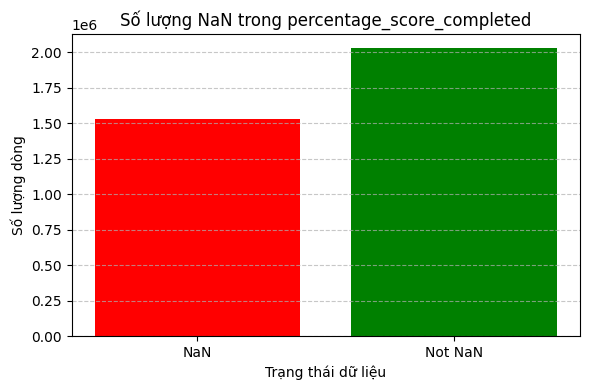

In [12]:
# Tính số lượng NaN và không NaN
nan_count = user_course_exercise['percentage_score_completed'].isna().sum()
not_nan_count = user_course_exercise['percentage_score_completed'].notna().sum()

# Vẽ biểu đồ
plt.figure(figsize=(6, 4))
plt.bar(['NaN', 'Not NaN'], [nan_count, not_nan_count], color=['red', 'green'])
plt.title('Số lượng NaN trong percentage_score_completed')
plt.ylabel('Số lượng dòng')
plt.xlabel('Trạng thái dữ liệu')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
user_course_exercise['percentage_score_completed'] = user_course_exercise['percentage_score_completed'].fillna(0)
user_course_exercise

,user_id,course_id,exercise_id,percentage_score_completed
0,U_10000,C_2033958,Ex_7006978,0.000000
1,U_10000,C_2033958,Ex_7006989,0.000000
2,U_10000,C_2033958,Ex_7006996,0.000000
3,U_10000,C_2033958,Ex_7007002,0.000000
4,U_10000,C_2033958,Ex_7007011,0.000000
...,...,...,...,...
3560944,U_99772,C_1903985,Ex_6179341,0.454545
3560945,U_99772,C_1903985,Ex_6179343,0.400000
3560946,U_99772,C_1903985,Ex_6179345,0.314286
3560947,U_99772,C_1903985,Ex_6179347,0.259259


In [14]:
grouped_df = user_course_exercise.groupby(['user_id', 'course_id']).agg({
    'exercise_id': list,
    'percentage_score_completed': list
}).reset_index()
grouped_df

,user_id,course_id,exercise_id,percentage_score_completed
0,U_10000,C_2033958,"[Ex_7006978, Ex_7006989, Ex_7006996, Ex_700700...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07142857..."
1,U_1000454,C_2199449,"[Ex_7396087, Ex_7396109, Ex_7396095, Ex_739609...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,U_1000979,C_947149,"[Ex_1431543, Ex_1431547, Ex_1431545, Ex_143154...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
3,U_1000982,C_947149,"[Ex_1431543, Ex_1431547, Ex_1431545, Ex_143154...","[0.6000000000000001, 0.4, 0.2, 0.0, 0.0, 0.0, ..."
4,U_1001176,C_947149,"[Ex_1431543, Ex_1431547, Ex_1431545, Ex_143154...","[0.4, 0.6000000000000001, 1.0, 0.6000000000000..."
...,...,...,...,...
117313,U_99746,C_674971,"[Ex_1642230, Ex_1642229, Ex_1642228, Ex_164222...","[0.0, 0.0, 1.0, 1.0, 1.0, 0.6956521739130435, ..."
117314,U_997506,C_2095102,"[Ex_7083106, Ex_7083102, Ex_7083090, Ex_708308...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
117315,U_99753,C_1428968,"[Ex_6381948, Ex_6381972, Ex_6422218, Ex_638192...","[0.7, 0.7, 0.9, 0.8, 1.0]"
117316,U_997542,C_2066096,"[Ex_7280076, Ex_7064486, Ex_7075957, Ex_740428...","[1.0, 0.0, 1.0, 1.0, 1.0, 1.0]"


In [15]:
grouped_df['avg_score'] = grouped_df['percentage_score_completed'].apply(lambda x: sum(x)/len(x) if len(x) > 0 else 0)
grouped_df

,user_id,course_id,exercise_id,percentage_score_completed,avg_score
0,U_10000,C_2033958,"[Ex_7006978, Ex_7006989, Ex_7006996, Ex_700700...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07142857...",0.005495
1,U_1000454,C_2199449,"[Ex_7396087, Ex_7396109, Ex_7396095, Ex_739609...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.007317
2,U_1000979,C_947149,"[Ex_1431543, Ex_1431547, Ex_1431545, Ex_143154...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000
3,U_1000982,C_947149,"[Ex_1431543, Ex_1431547, Ex_1431545, Ex_143154...","[0.6000000000000001, 0.4, 0.2, 0.0, 0.0, 0.0, ...",0.107692
4,U_1001176,C_947149,"[Ex_1431543, Ex_1431547, Ex_1431545, Ex_143154...","[0.4, 0.6000000000000001, 1.0, 0.6000000000000...",0.632234
...,...,...,...,...,...
117313,U_99746,C_674971,"[Ex_1642230, Ex_1642229, Ex_1642228, Ex_164222...","[0.0, 0.0, 1.0, 1.0, 1.0, 0.6956521739130435, ...",0.297634
117314,U_997506,C_2095102,"[Ex_7083106, Ex_7083102, Ex_7083090, Ex_708308...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",0.111111
117315,U_99753,C_1428968,"[Ex_6381948, Ex_6381972, Ex_6422218, Ex_638192...","[0.7, 0.7, 0.9, 0.8, 1.0]",0.820000
117316,U_997542,C_2066096,"[Ex_7280076, Ex_7064486, Ex_7075957, Ex_740428...","[1.0, 0.0, 1.0, 1.0, 1.0, 1.0]",0.833333


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


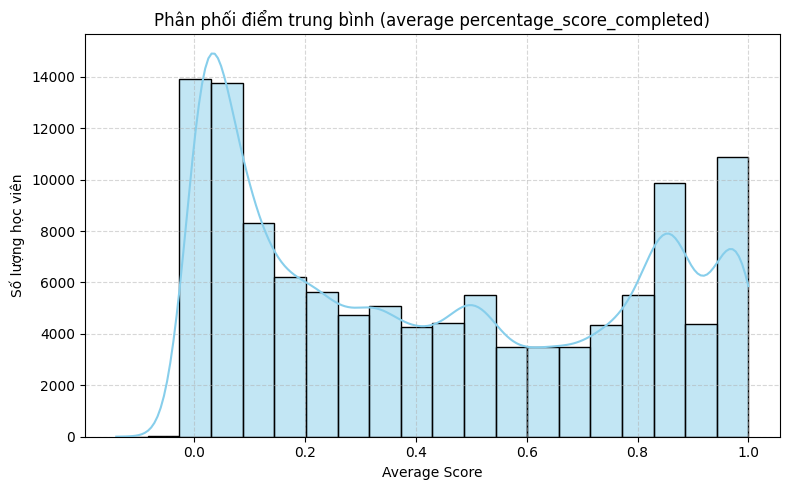

In [16]:
# Vẽ histogram
plt.figure(figsize=(8, 5))
sns.histplot(grouped_df['avg_score'], bins=20, kde=True, color='skyblue')

# Tùy chỉnh
plt.title('Phân phối điểm trung bình (average percentage_score_completed)')
plt.xlabel('Average Score')
plt.ylabel('Số lượng học viên')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [17]:
grouped_df.to_csv("assignment_score.csv", index = False)